In [ ]:
# start
import pandas as pd
df = pd.read_csv('/home/gathua/projects/Class Project/testdata.csv')
df.shape
df.describe()
df.values


<class 'pandas.core.frame.DataFrame'>


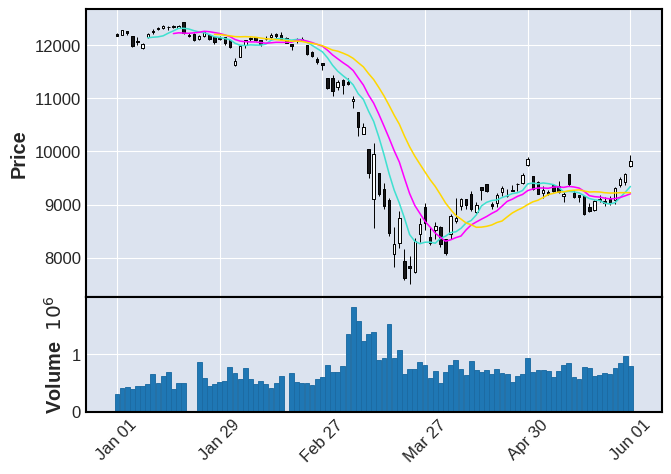

In [2]:
import mplfinance as mpf
import pandas as pd

intraday = pd.read_csv(
    'testdata.csv', index_col=0, parse_dates=True)
# Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
iday = intraday.loc['2020-01-01':'2020-06-01', :]
print(type(iday))
mpf.plot(iday, type='candle', mav=(7, 12, 20), volume=True)


In [ ]:
import pandas as pd
df = pd.read_csv('/home/gathua/projects/Class Project/dailydata1.csv',
                 parse_dates=True, index_col=0)
print(df[['Open', 'High']].head())


In [ ]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')
df = pd.read_csv('/home/gathua/projects/Class Project/testdata.csv',
                 parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())


In [ ]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')
df = pd.read_csv('/home/gathua/projects/Class Project/testdata.csv',
                 parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.tail())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195  4546.200195   
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098  4732.350098   
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805  4747.549805   
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805  4837.549805   
2007-09-24  4837.149902  4941.149902  4837.149902  4932.200195  4932.200195   

            Volume        100ma         20ma  
Date                                          
2007-09-18     0.0  4546.200195  4546.200195  
2007-09-19     0.0  4639.275147  4639.275147  
2007-09-20     0.0  4675.366699  4675.366699  
2007-09-21     0.0  4715.912476  4715.912476  
2007-09-24     0.0  4759.170020  4759.170020  


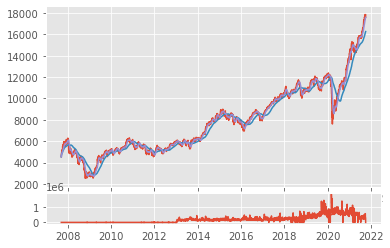

In [2]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')
df = pd.read_csv('/home/gathua/projects/Class Project/training model/testdata.csv',
                 parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df['20ma'] = df['Adj Close'].rolling(window=20, min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['20ma'])
ax2.plot(df.index, df['Volume'])

plt.show()


      Date         open         high          low        close
0  13774.0  4546.200195  5000.549805  4546.200195  5000.549805
1  13784.0  5021.350098  5210.799805  5021.350098  5185.850098
2  13794.0  5085.100098  5670.399902  5085.100098  5559.299805
3  13804.0  5351.000000  5702.299805  5184.000000  5702.299805
4  13814.0  5905.899902  5932.399902  5786.500000  5786.500000


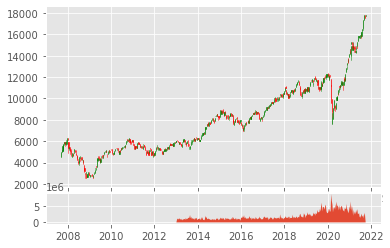

In [3]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
style.use('ggplot')

df = pd.read_csv('/home/gathua/projects/Class Project/training model/testdata.csv',
                 parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()


candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
print(df_ohlc.head())
plt.show()


In [ ]:
"""Using The mplfinance module to simlify implementing moving averages and using candlestick charts"""
import mplfinance as mpf
import pandas as pd
daily = pd.read_csv(
    '/home/gathua/projects/Class Project/testdata.csv', index_col=0, parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)
mpf.plot(daily, type='candle', mav=(3, 6, 9), volume=True)
mpf.plot(daily, type='line')
mpf.plot(daily, type='ohlc', mav=4)


In [ ]:
""" 
The loc function will slice specified data periods based on the index of the dataframe
# one can drop a column by caling the drop function (in this case) intraday = intraday.drop('Volume', axis=1)
"""
import mplfinance as mpf
import pandas as pd

intraday = pd.read_csv(
    '~/projects/Class Project/testdata2.csv', index_col=0, parse_dates=True)
# Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
iday = intraday.loc['2020-01-01':'2020-07-01', :]
print(type(iday))
mpf.plot(iday, type='candle', mav=(7, 12, 20), volume=True)


In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.nse.co.ke/information-products-and-services/live-data.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
print(page.text)


In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.rich.co.ke/rcdata/nsestocks.php"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
print(page.text)


In [ ]:
import calendar
from datetime import date
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import time
import csv
import pandas as pd
import pytz
import os
import requests
from bs4 import BeautifulSoup
import pickle
import datetime
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError

import logging
from functools import wraps

logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)


def alpha_args_logger(orig_func):
    logging.basicConfig(filename='{}.log'.format(
        orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs)
        )
        return orig_func(*args, **kwargs)
    return wrapper


def alpha_timer(orig_func):
    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'. format(orig_func.__name__, t2))

    return wrapper


URL = "https://afx.kwayisi.org/nse/"
page = requests.get(URL)


def access_axf():
    options = Options()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    options.add_argument('--headless')
    driver = webdriver.Chrome(
        "/usr/bin/chromedriver", options=options)
    driver.get("https://afx.kwayisi.org/nse/")

    page_source = driver.page_source

    soup = BeautifulSoup(page_source, 'lxml')

    return soup

# access_axf()


def list_nse_tickers():
    """ Returns a list of all tickers """
    tickers = []
    stocks = tableDataText()
    for stock in stocks[1:]:
        ticker = stock[0]
        tickers.append(ticker)

    with open("list_current_tickers.pickle", "wb") as f:
        pickle.dump(ticker, f)

    return tickers

# list_nse_tickers()


def tableDataText():
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    soup = access_axf()

    def rowgetDataText(tr, coltag='td'):  # td (data) or th (header)
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]

    current = []
    trs = soup.find('div', class_='t').find_all('tr')
    headerow = rowgetDataText(trs[0], 'th')
    if headerow:  # if there is a header row include first
        current.append(headerow)
        trs = trs[1:]

    for tr in trs:  # for every table row
        current.append(rowgetDataText(tr, 'td'))  # data row

    return current

# tableDataText()


def get_current_data():
    if not os.path.exists('nse_dfs'):
        os.makedirs('nse_dfs')

    now = datetime.datetime.now()
    current_time = now.strftime("%H:%M:%S")

    print("Current Time is", current_time)

    market_opening_time = now.replace(
        hour=9, minute=00, second=0, microsecond=0)
    market_closing_time = now.replace(
        hour=17, minute=00, second=0, microsecond=0)

    if now > market_opening_time and now < market_closing_time:
        msg = "Open"
    elif now == market_opening_time:
        msg = "Opening"
    elif now == market_closing_time:
        msg = "Closing"
    else:
        msg = "Closed"

    all_current_data = tableDataText()
    date = datetime.datetime.now(pytz.timezone('Africa/Nairobi'))

    fieldnames = ['Date', 'Open', 'High',
                  'Low', 'Close', 'Adj Close', 'Volume']

    for current_data in all_current_data[1:]:
        ticker = current_data[0]

        try:
            start = float(current_data[3])
            high = float(current_data[3])
            low = float(current_data[3])
            stock_high = float(current_data[3])
            stock_low = float(current_data[3])
        except ValueError:
            start = float(current_data[3].replace(',', ""))
            high = float(current_data[3].replace(',', ""))
            low = float(current_data[3].replace(',', ""))
            stock_high = float(current_data[3].replace(',', ""))
            stock_low = float(current_data[3].replace(',', ""))

        if high >= stock_high:
            high = high
        else:
            high = stock_high

        if low <= stock_low:
            low = low
        else:
            low = stock_low

        rows = [{
            'Date': str(date),
            'Open': start,
            'High': high,
            'Low': low,
            'Close': current_data[3],
            'Adj Close': current_data[3],
            'Volume': current_data[2],
        }]

        if not os.path.exists("nse_dfs/{}.csv".format(ticker)):
            try:
                with open('nse_dfs/{}.csv'.format(ticker), "w", encoding='UTF8', newline='') as f:
                    csv_writer = csv.DictWriter(
                        f, fieldnames=fieldnames)
                    csv_writer.writeheader()
                    csv_writer.writerows(rows)
            except RemoteDataError as exp:
                print('Unable to read data from: {}'.format(ticker))
        else:
            try:
                with open('nse_dfs/{}.csv'.format(ticker), "a", encoding='UTF8', newline='') as f:
                    csv_writer = csv.DictWriter(
                        f, fieldnames=fieldnames)
                    csv_writer.writerows(rows)
            except RemoteDataError as exp:
                print('Unable to read data from: {}'.format(ticker))

# get_current_data()


def automate_data_collection():
    now = datetime.datetime.now()
    market_opening_time = now.replace(
        hour=9, minute=00, second=0, microsecond=0)
    market_closing_time = now.replace(
        hour=17, minute=00, second=0, microsecond=0)

    """ Data collection will happen between MONDAY[0] and FRIDAY[4].  """
    crawling_day = False
    crawling_time = False
    today_id = date.today().weekday()
    day_name = calendar.day_name[my_date]

    if today_id >= 0 and today_id <= 4:
        msg = "Today is {}".format(day_name)
        crawling_day = True

    if now > market_opening_time and now < market_closing_time:
        msg = "Running at {}".format(now)
        crawling_time = True

    """ Data collection will happen between Opening time 9.00 am and Closing time 5.00pm.  """
    while crawling_day and crawling_time:
        get_current_data()

    # while now > market_opening_time:
    #     print("running past crawling time")
    #     get_current_data()


automate_data_collection()


In [9]:
import calendar
from datetime import date
import datetime
today = datetime.datetime.today().weekday()
print(today)

my_date = date.today().weekday()
calendar.day_name[my_date]


5


'Friday'

In [2]:
""" # import pytz
# pytz.all_timezones """

""" # import pandas as pd

# products_list = ['laptop', 'printer', 'tablet', 'desk', 'chair']

# df = pd.DataFrame(products_list, columns=['product_name'])
# print(df) """

""" import time
import logging
from functools import wraps
def my_logger(orig_func):
    logging.basicConfig(filename='{}.log'.format(
        orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs)
        )
        return orig_func(*args, **kwargs)
    return wrapper


def my_timer(orig_func):
    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'. format(orig_func.__name__, t2))

    return wrapper


@my_logger
@my_timer
def display_info(name, age):
    time.sleep(1)
    print('display_info ran with arguments({},{})'.format(name, age))


display_info('John', 25)


print(display_info.__name__) """

logging.basicConfig()

logging.debug("A Debug Logging Message")

logging.info("A Info Logging Message")

logging.warning("A Warning Logging Message")

logging.error("An Error Logging Message")

logging.critical("A Critical Logging Message")


In [1]:
import logging
logging.basicConfig(level=logging.INFO, filename='datacamp.log')

logging.debug("A Debug Logging Message")

logging.info("A Info Logging Message")

logging.warning("A Warning Logging Message")

logging.error("An Error Logging Message")

logging.critical("A Critical Logging Message")


In [13]:
"""
The options are the customizations for the webdriver
incognito so it will not leave a browser history
headless so it does not make chrome window pop-ups
"""
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(
    "/usr/bin/chromedriver", options=options)


In [14]:

import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(
    "/usr/bin/chromedriver", options=options)
driver.get(
    "https://www.tripadvisor.com/Airline_Review-d8729157-Reviews-Spirit-Airlines#REVIEWS")


In [12]:
from selenium.webdriver import ActionChains
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common import action_chains

options = Options()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')

driver = webdriver.Chrome(
    "/usr/bin/chromedriver", options=options)

driver.get(
    "https://live.mystocks.co.ke/price_list/")

xpath_str = '/html/body/div/div[2]/div[2]/table[1]/tbody/tr/td[1]/a'
element = driver.find_element_by_xpath(xpath_str)

# action_chains.move_to_element(element).click().perform()

actions = ActionChains(driver)
actions.move_to_element(element).click().perform()
# for count, i in range (0, 4000):
#     actions = ActionChains(driver)
#     actions.move_to_element(element).click().perform()
#     if count % 10 == 0:
#             # Monitor progress by printing how far the progress is
#             print("Reached",count)

In [ ]:
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(
    "/usr/bin/chromedriver", options=options)
driver.get(
    "https://www.tripadvisor.com/Airline_Review-d8729157-Reviews-Spirit-Airlines#REVIEWS")
more_buttons = driver.find_elements_by_class_name("moreLink")
for x in range(len(more_buttons)):
    if more_buttons[x].is_displayed():
        driver.execute_script("arguments[0].click();", more_buttons[x])
        time.sleep(1)
page_source = driver.page_source

soup = BeautifulSoup(page_source, 'lxml')
reviews = []
reviews_selector = soup.find_all('div', class_='reviewSelector')
for review_selector in reviews_selector:
    review_div = review_selector.find('div', class_='dyn_full_review')
    if review_div is None:
        review_div = review_selector.find('div', class_='basic_review')
    review = review_div.find('div', class_='entry').find('p').get_text()
    review = review.strip()
    reviews.append(review)

print(soup)


In [ ]:
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(
    "/usr/bin/chromedriver", options=options)
driver.get(
    "https://afx.kwayisi.org/nse/")

print(driver.title)
all_data = driver.find_elements_by_id("ticker")

for item in all_data:
    print(item.text)

page_source = driver.page_source

soup = BeautifulSoup(page_source, 'lxml')
print(soup)


In [ ]:
"""
Getting the NYSE fortune 500 companies list
Aims at using this readily available stock data to train the models
"""

import bs4 as bs
import pickle
import requests


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    # print(tickers)

    return tickers


save_sp500_tickers()


In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2016, 1, 27)
df = web.DataReader("GOOGL", 'yahoo', start, end)

dates = []
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['dates'] = dates

print df.head()
print df.tail()


In [ ]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    # print(tickers)

    return tickers


# save_sp500_tickers()

def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)

    # for ticker in tickers:
    """ to filter the first 100 stocks/ instances of the stocks """
    for ticker in tickers[:100]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except RemoteDataError as exp:
                print('Unable to read data from: {}'.format(ticker))

        else:
            print('The file {} exists'.format(ticker))


get_data_from_yahoo()


In [2]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    # print(tickers)

    return tickers


save_sp500_tickers()


def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)

    # for ticker in tickers:
    """ to filter the first 100 stocks/ instances of the stocks """
    for ticker in tickers[:100]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except RemoteDataError as exp:
                print('Unable to read data from: {}'.format(ticker))

        else:
            print('The file {} exists'.format(ticker))


# get_data_from_yahoo()


In [ ]:
# ================================================
""" 
The loc function will slice specified data periods based on the index of the dataframe
# one can drop a column by caling the drop function (in this case) intraday = intraday.drop('Volume', axis=1)
"""
import mplfinance as mpf
import pandas as pd

intraday = pd.read_csv(
    '/home/gathua/projects/Class Project/testdata.csv', index_col=0, parse_dates=True)
# Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
iday = intraday.loc['2020-01-01':'2020-06-01', :]
mpf.plot(iday, type='candle', mav=(7, 12, 20), volume=True)


main_df = pd.DataFrame()

intraday.drop(columns=["Volume", "Close", "Open",
                       "High", "Low"], axis=1, inplace=True)

print(intraday.head())
if main_df.empty:
    main_df = intraday
else:
    main_df = main_df.join(intraday, how='outer')

print(main_df.head())
main_df.to_csv('nsei_adj_closes.csv')


def visualize_main_data():
    df = pd.read_csv('nsei_adj_closes.csv')
    # df.plot()
    df_corr = df.corr()
    # If working with the cell above would produce a correlation table of all the data
    print("Correlation:", df_corr)


visualize_main_data()


In [ ]:
""" To collect all the adjacent close data from the csv files """

import pickle
import pandas as pd


def check_file_exists():
    cos = []
    dropped_cos = []
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            with open("sp500tickers.pickle", "rb") as f:
                companies = pickle.load(f)
            print('The file {}.csv does not exist'.format(ticker))
            dropped_cos.append(ticker)
            print("The dropped companies will be", len(dropped_cos))

            print(type(companies))
            print(len(companies))

            # companies.remove(dropped_cos)
            companies = [ele for ele in companies if ele not in dropped_cos]
            print(len(companies))

            with open("sp500tickers.pickle", "wb") as f:
                pickle.dump(companies, f)


check_file_exists()


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    print("When starting the main df is", main_df)
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            print("FileNotFoundError")

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        print("The shape is", df.shape)
        print("The columns are", df.columns)
        # df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], inplace=True)

        """ 
        Note: Introduced in v0.21.0 (October 27, 2017), the drop() method accepts index/columns keywords
        as an alternative to specifying the axis.
        """
        df.drop(columns=["Volume", "Close", "Open",
                         "High", "Low"], axis=1, inplace=True)

        print("The header after dropping", df.head())

        print("The main df is", main_df)
        try:
            if main_df.empty:
                main_df = df
                print(
                    "The dataframe main_df has been populated with the new df values", main_df.head())
            else:
                print("The dataframe main_df was not empty")
                main_df = main_df.join(df, how='outer')
        except AttributeError:
            pass

        except KeyError:
            pass

        if count % 10 == 0:
            # Monitor progress by printing how far the progress is
            print(count)

    print("Finally main df head is", main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()


<!-- The final complete training file -->


In [ ]:
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np


def process_data_for_label(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    print(tickers)
    print(df)

    print(df['MMM\n'])

    print(df['MMM\n'].shift(-7))

    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (
            df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df


stock = "MMM"
# process_data_for_label(""+ stock +"\n")


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02

    for col in cols:
        if col > requirement:
            return 1   # buy
        elif col < -requirement:
            return-1   # sell
        else:
            return 0   # hold


def extract_featuredsets(ticker):
    tickers, df = process_data_for_label(ticker)

    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()

    str_vals = [str(i) for i in vals]

    print('Data spread', Counter(str_vals))
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df


stock = "MMM"
extract_featuredsets("" + stock + "\n")


In [ ]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    logging.info(tickers)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    return tickers


# save_sp500_tickers()

def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)

    # for ticker in tickers:
    """ to filter the first 100 stocks/ instances of the stocks """
    for ticker in tickers[:100]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except RemoteDataError as exp:
                print('Unable to read data from: {}'.format(ticker))

        else:
            print('The file {} exists'.format(ticker))


# get_data_from_yahoo()


def check_file_exists():
    cos = []
    dropped_cos = []
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            with open("sp500tickers.pickle", "rb") as f:
                companies = pickle.load(f)
            print('The file {}.csv does not exist'.format(ticker))
            dropped_cos.append(ticker)
            print("The dropped companies will be", len(dropped_cos))

            print(type(companies))
            print(len(companies))

            # companies.remove(dropped_cos)
            companies = [ele for ele in companies if ele not in dropped_cos]
            print(len(companies))

            with open("sp500tickers.pickle", "wb") as f:
                pickle.dump(companies, f)


check_file_exists()


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    print("When starting the main df is", main_df)
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            print("FileNotFoundError")

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        print("The shape is", df.shape)
        print("The columns are", df.columns)
        # df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], inplace=True)

        """ 
        Note: Introduced in v0.21.0 (October 27, 2017), the drop() method accepts index/columns keywords
        as an alternative to specifying the axis.
        """
        df.drop(columns=["Volume", "Close", "Open",
                         "High", "Low"], axis=1, inplace=True)

        print("The header after dropping", df.head())

        print("The main df is", main_df)
        try:
            if main_df.empty:
                main_df = df
                print(
                    "The dataframe main_df has been populated with the new df values", main_df.head())
            else:
                print("The dataframe main_df was not empty")
                main_df = main_df.join(df, how='outer')
        except AttributeError:
            pass

        except KeyError:
            pass

        if count % 10 == 0:
            # Monitor progress by printing how far the progress is
            print(count)

    print("Finally main df head is", main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


# compile_data()


def process_data_for_label(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    print(tickers)
    print(df)

    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (
            df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df


stock = "MMM"
# process_data_for_label(""+ stock +"\n")


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.05

    for col in cols:
        if col > requirement:
            return 1   # buy
        elif col < -requirement:
            return-1   # sell
        else:
            return 0   # hold


def extract_featuredsets(ticker):
    tickers, df = process_data_for_label(ticker)

    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()

    str_vals = [str(i) for i in vals]

    print('Data spread', Counter(str_vals))

    df.fillna(0, inplace=True)

    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df


stock = "AFL"
extract_featuredsets("" + stock + "\n")


def check_correlation():
    df = pd.read_csv('sp500_joined_closes.csv')
    # df.plot()
    df_corr = df.corr()
    # If working with the cell above would produce a correlation table of all the data
    print("Correlation:", df_corr)


check_correlation()


({'0': 3499, '1': 430, '-1': 381})


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.int(x)


x = np.arange(1, 15.1, 0.1)
plt.plot(x, f(x))
plt.show()


def f(x):
    return np.int(x)


f2 = np.vectorize(f)
x = np.arange(1, 15.1, 0.1)
plt.plot(x, f2(x))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import neighbors as kn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
n = [3, 5, 7, 9, 11]
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
""" dataset = pd.read_csv(
    '~/projects/class-project/colon_cancer_train_1 (1).libsvm') """

dataset = pd.read_csv(url, names=names)

print(dataset.head())
print(dataset.shape)

X = dataset.iloc[:, :1].values
y = dataset.iloc[:, :6].values

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()


metrics = sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])
print(metrics)

knn_c = kn.KNeighborsClassifier(n_neighbors=n, metric=metrics[0])
knn_c.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.neighbors as kn

n = [3, 5, 7, 9, 11]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
print(dataset.head())


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

metrics = sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])
print(metrics)

for metric in metrics:
    print(metric)
    if metric != 'precomputed':
        print("new metric", metric)


knn_c = kn.KNeighborsClassifier(n_neighbors=n[0], metric=metrics[0])
knn_c.fit(X_train, y_train)

y_pred = knn_c.predict(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("The confusion matrix", confusion_matrix(y_test, y_pred))
print("The classification report", classification_report(y_test, y_pred))


error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.neighbors as kn

n = [3, 5, 7, 9, 11]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
print(dataset.head())


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

metrics = sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])
print(metrics)

for metric in metrics:
    print(metric)
    if metric != 'precomputed':
        print("used metric", metric)

        for x in n:
            print("used n", x)
            knn_c = kn.KNeighborsClassifier(n_neighbors=x, metric=metric)
            knn_c.fit(X_train, y_train)

            y_pred = knn_c.predict(X_test)

            classifier = KNeighborsClassifier(n_neighbors=5)
            classifier.fit(X_train, y_train)

            y_pred = classifier.predict(X_test)

            print("The confusion matrix", confusion_matrix(y_test, y_pred))
            print("The classification report",
                  classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""
import seaborn as sns
import mplfinance as mpf
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np
import logging

from sklearn import svm, model_selection, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# logging.basicConfig(level=logging.INFO, filename='datacamp.log')
logging.basicConfig(level=logging.INFO)


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    retained_tickers = []
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    if not os.path.exists("sp500tickers.pickle"):
        with open("sp500tickers.pickle", "wb") as f:
            pickle.dump(tickers, f)
    else:
        pass

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    for ticker in tickers[:100]:
        retained_tickers.append(ticker.replace("\n", ""))

    return retained_tickers

# save_sp500_tickers()  # Remember to uncomment


def add_data_to_csv():
    # Get all 100 retained tickers
    retained_tickers = save_sp500_tickers()

    # Will contain a list of the tickers with data
    populated_tickers = []

    for ticker in retained_tickers:
        """ add ticker data to csv files """
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader('{}'.format(ticker), 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
                populated_tickers.append(ticker)

            except RemoteDataError as error:
                print("Error, Cannot add data to {}.csv".format(ticker))
                pass
            except KeyError as e:
                print("Skipping {}".format(ticker))
                pass

        else:
            print('The file {} exists'.format(ticker))

    return populated_tickers


add_data_to_csv()


def compile_data():
    """ Get data fro  yahoo finace """
    get_data_from_yahoo()

    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    print("When starting the main df is", main_df)
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            print("FileNotFoundError")

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        print("The shape is", df.shape)
        print("The columns are", df.columns)
        # df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], inplace=True)

        """ 
        Note: Introduced in v0.21.0 (October 27, 2017), the drop() method accepts index/columns keywords
        as an alternative to specifying the axis.
        """
        df.drop(columns=["Volume", "Close", "Open",
                         "High", "Low"], axis=1, inplace=True)

        print("The header after dropping", df.head())

        print("The main df is", main_df)
        try:
            if main_df.empty:
                main_df = df
                print(
                    "The dataframe main_df has been populated with the new df values", main_df.head())
            else:
                print("The dataframe main_df was not empty")
                main_df = main_df.join(df, how='outer')
        except AttributeError:
            pass

        except KeyError:
            pass

        if count % 10 == 0:
            # Monitor progress by printing how far the progress is
            print(count)

    print("Finally main df head is", main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

# compile_data()


def process_data_for_label(ticker):
    compile_data()
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    # print(tickers)
    # print(df)

    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (
            df[ticker].shift(-i) - df[ticker]) / df[ticker]
        # print(df)

    df.fillna(0, inplace=True)
    return tickers, df


stock = "MMM"
# process_data_for_label(""+ stock +"\n")


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.025

    for col in cols:
        if col > requirement:
            return 1   # buy
        elif col < -requirement:
            return-1   # sell
        else:
            return 0   # hold


def extract_featuredsets(ticker):
    tickers, df = process_data_for_label(ticker)

    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()

    str_vals = [str(i) for i in vals]

    print('Data spread', Counter(str_vals))

    df.fillna(0, inplace=True)

    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df


stock = "AFL"
# extract_featuredsets("" + stock + "\n")


def check_correlation():
    df = pd.read_csv('sp500_joined_closes.csv')
    correlation = df.corr()
    sns.heatmap(correlation, xticklabels=correlation.columns,
                yticklabels=correlation.columns, annot=True)


check_correlation()


def show_graph(ticker):
    print("Working on", ticker)

    intraday = pd.read_csv(
        'sp500_joined_closes.csv', index_col=0, parse_dates=True)
    # Volume is zero anyway for this intraday data set
    intraday.index.name = 'Date'
    intraday.shape
    iday = intraday.loc['2020-01-01':'2020-06-01', :]
    print(type(iday))
    mpf.plot(iday, type='candle', mav=(7, 12, 20), volume=True)


stock = "ANSS"
# show_graph("" + stock + "\n")


def do_ml(ticker):
    X, y, df = extract_featuredsets(ticker)

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.25)

    # clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier(
        [('lsvc', svm.LinearSVC()), ('knn', neighbors.KNeighborsClassifier()), ('rfor', RandomForestClassifier())])
    clf.fit(X_train, y_train)

    confidence = clf.score(X_test, y_test)

    predictions = clf.predict(X_test)

    print(ticker)

    print('Predicted spread', Counter(predictions))

    print("Confidence is:", confidence)


stock = "LNT"
# do_ml("" + stock + "\n")


In [ ]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""
import mplfinance as mpf
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np
import logging

from sklearn import svm, model_selection, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# logging.basicConfig(level=logging.INFO, filename='datacamp.log')
logging.basicConfig(level=logging.INFO)


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    retained_tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    if not os.path.exists("sp500tickers.pickle"):
        with open("sp500tickers.pickle", "wb") as f:
            pickle.dump(tickers, f)
    else:
        pass

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    for ticker in tickers[:100]:
        retained_tickers.append(ticker.replace("\n", ""))

    return retained_tickers

# save_sp500_tickers()  # Remember to uncomment


def add_data_to_csv():
    # Get all 100 retained tickers
    retained_tickers = save_sp500_tickers()

    # Will contain a list of the tickers with data
    populated_tickers = []

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)

    for ticker in retained_tickers:
        """ add ticker data to csv files """
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader('{}'.format(ticker), 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
                populated_tickers.append(ticker)
            except RemoteDataError as error:
                print("Error, Cannot add data to {}.csv".format(ticker))
                pass
            except KeyError as e:
                print("Skipping {}".format(ticker))
                pass

        else:
            print('The file {} exists'.format(ticker))

    if not os.path.exists("sp500populatedtickers.pickle"):
        with open("sp500populatedtickers.pickle", "wb") as f:
            pickle.dump(populated_tickers, f)

    with open("sp500populatedtickers.pickle", "rb") as f:
        populated_tickers = pickle.load(f)

    # print(populated_tickers)

    return populated_tickers

# add_data_to_csv()


def populated_tickers():
    with open("sp500populatedtickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    return tickers

# populated_tickers()


def compile_data():
    with open("sp500populatedtickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    joined_df = pd.DataFrame()
    print("When starting the main df is", main_df)
    all_data = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            print("FileNotFoundError")

        df.rename(columns={'Adj Close': ticker}, inplace=True)

        df.drop(columns=["Volume", "Close", "Open",
                         "High", "Low"], axis=1, inplace=True)

        all_data.join(df, how='outer')

        if main_df.empty:
            main_df = df
            # print("Main df is", main_df)

        elif not main_df.empty:
            main_df = main_df.join(df, how='outer')
            # print("Main df is", main_df)

        else:
            pass

        if count % 10 == 0:
            # Monitor progress by printing how far the progress is
            print(count)

    # print("Finally main df head is", main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()


def process_data_for_label(ticker):
    tickers = populated_tickers()
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    df.fillna(0, inplace=True)

    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (
            df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df


stock = "MMM"
# process_data_for_label(stock)


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.025

    for col in cols:
        if col > requirement:
            return 1   # buy
        elif col < -requirement:
            return-1   # sell
        else:
            return 0   # hold


def extract_featuredsets(ticker):
    tickers, df = process_data_for_label(ticker)

    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()

    str_vals = [str(i) for i in vals]

    print('Data spread', Counter(str_vals))

    df.fillna(0, inplace=True)

    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df


stock = "MMM"
# extract_featuredsets(stock)


def check_correlation():
    df = pd.read_csv('sp500_joined_closes.csv')
    # df.plot()
    print(df.index)
    print(type(df))
    print(df.shape)
    df_corr = df.corr()
    # If working with the cell above would produce a correlation table of all the data
    print(pd)
    print("Correlation:", df_corr)

# check_correlation()


# Will need to join data of all datasets to have all fields
def show_graph(ticker):
    print("Working on", ticker)

    intraday = pd.read_csv(
        'sp500_joined_closes.csv', index_col=0, parse_dates=True)
    # Volume is zero anyway for this intraday data set
    intraday.index.name = 'Date'
    intraday.shape
    iday = intraday.loc['2020-01-01':'2020-06-01', :]
    print(type(iday))
    mpf.plot(iday, type='candle', mav=(7, 12, 20), volume=True)


stock = "ANSS"
# show_graph(stock)


def do_ml(ticker):
    X, y, df = extract_featuredsets(ticker)

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.25)

    # clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier(
        [('lsvc', svm.LinearSVC()), ('knn', neighbors.KNeighborsClassifier()), ('rfor', RandomForestClassifier())])
    clf.fit(X_train, y_train)

    confidence = clf.score(X_test, y_test)

    predictions = clf.predict(X_test)

    print(ticker)

    print('Predicted spread', Counter(predictions))

    print("Confidence is:", confidence)


stock = "LNT"
# do_ml(stock)


In [ ]:
import seaborn as sns
import pandas as pd


def check_correlation():
    df = pd.read_csv('sp500_joined_closes.csv')
    correlation = df.corr()
    # sns.heatmap(correlation, xticklabels=correlation.columns,
    #             yticklabels=correlation.columns, annot=True)
    sns.pairplot(df)

# check_correlation()


def check_correlation_2():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()

    print("Correlation:", df_corr)

# check_correlation_2()


def heat_map():
    df = pd.read_csv('sp500_joined_closes.csv')
    correlation = df.corr()
    sns.heatmap(correlation, annot=True)


heat_map()


In [ ]:
from sklearn.linear_model import LinearRegression
import mplfinance as mpf
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np
import logging

from sklearn import svm, model_selection, neighbors, preprocessing
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def predict_movement(ticker):
    try:
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
    except FileNotFoundError:
        print("FileNotFoundError")

    print(df.tail())
    print(df.describe())
    print(df.shape)
    print(df.isnull().sum())
    train = df.drop(['High','Low','Open','Close','Volume'], axis=1)
    test = df['Open']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        train, test, test_size=0.3, random_state=2)
    clf = LinearRegression()
    clf.fit(train,test)

    prediction = (clf.predict(X_test))
    print(prediction)
    print(clf.score(X_test,y_test))
    




    # df.rename(columns={'Adj Close': ticker}, inplace=True)
    df2 = df.assign(prediction="")
    df2.dropna(inplace=True)
    # forecast_time = int(days)
    forecast_time = int(5)

    X = np.array(df2.drop(['prediction'], 1))
    y = np.array(df2['prediction'])
    X = preprocessing.scale(X)
    X_prediction = X[-forecast_time:]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.5)

    # Performing the Regression on the training data
    clf = LinearRegression().fit(X, y)
    print("Prediction X", X_prediction)
    prediction = (clf.predict(X_prediction))

    # def sendMessage(args):
    #     # Sending the SMS if the predicted price of the stock is at least 1 greater than the previous closing price
    #     last_row = df.tail(1)
    #     if (float(prediction[4]) > (float(last_row['close']))):
    #         msg = ("\n\nStock:" + str(stock) + "\nPrior Close:\n" +
    #                str(last_row['close']) + "\n\nPrediction in 1 Day: " + str(prediction[0]) + "\nPrediction in 5 Days: " + str(prediction[4]))

    #     print(msg)
    # sendMessage()


predict_movement("ABT")

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns
import matplotlib.pyplot as plt


def predict_movement(ticker):
    try:
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker), index_col='Date', parse_dates=True)
        # df.set_index('Date', inplace=True)
    except FileNotFoundError:
        print("FileNotFoundError")

    # print(df.head())
    a_df = df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)
    print(df.tail())
    sns.set_style('darkgrid')
    pd.plotting.register_matplotlib_converters()
    sns.mpl.rc('figure',figsize=('19,13'))
    fig, ax = plt.subplots()
    lags = ar_select_order(a_df, maxlag=30)
    model = AutoReg(df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    # print(len(a_df))

    train_df = a_df.iloc[50:4472]
    test_df = a_df.iloc[4472:]

    train_model = AutoReg(a_df['Adj Close'], 500).fit(cov_type="HC0")
    start = len(train_df)
    end=len(train_df) + len(test_df)-1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    ax = test_df.plot(ax=ax)
    ax=prediction.plot(ax=ax)

    forecast = train_model.predict(start=end, end=end+160, dynamic=True)
    ax=forecast.plot(ax=ax)

predict_movement('LNT')


/home/gathua/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/gathua/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/gathua/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/gathua/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is rel

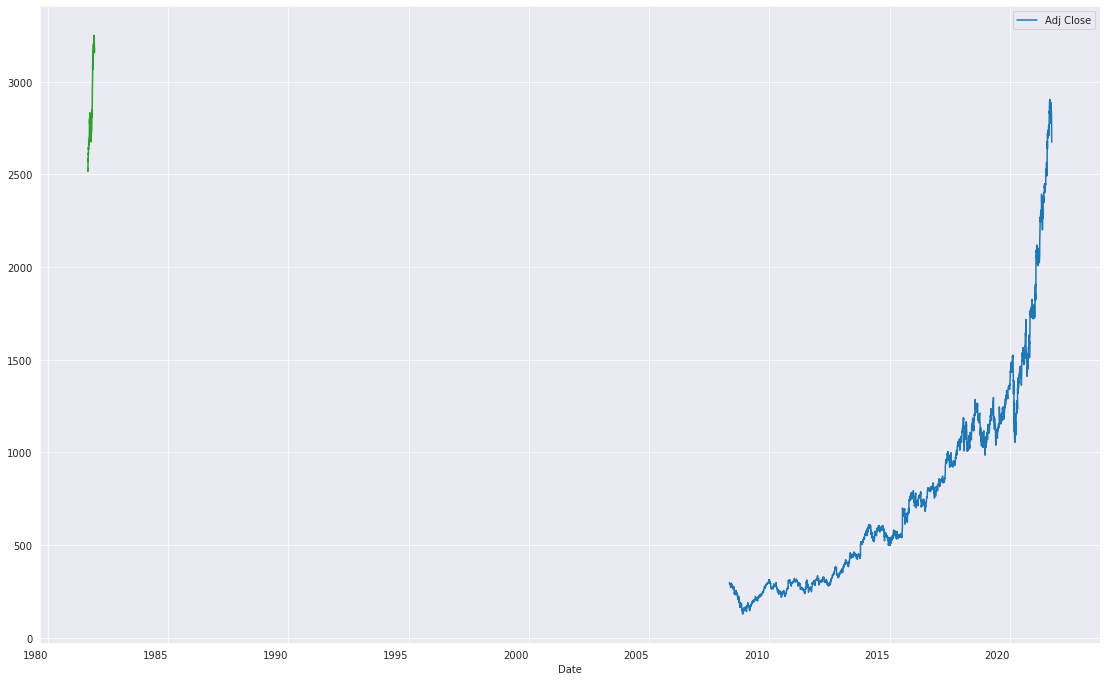

In [74]:
# Provides ways to work with large multidimensional arrays
import seaborn as sns
import statsmodels.api as sm
from os.path import isfile, join
from os import listdir
import os
import time
import mplfinance as mpf  # Matplotlib finance
import datetime as dt  # For defining dates
import numpy as np
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web  # Reads stock data
import matplotlib.pyplot as plt  # Plotting
import matplotlib.dates as mdates  # Styling dates
%matplotlib inline


# Used to get data from a directory

#Statsmodels is a great library we can use to run regressions.
# Seaborn extends the capabilities of Matplotlib


# Define path to files
# For MacOS
PATH = ""
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)


def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date',
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

def predict_movement(ticker):
    try:
        a_df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                         index_col='Date', parse_dates=True)
        # df.set_index('Date', inplace=True)
    except FileNotFoundError:
        print("FileNotFoundError")

    # Delete daily return column
    a_df = a_df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)

    # Set style for seaborn plot
    sns.set_style('darkgrid')
    # Add automatic datetime converters
    pd.plotting.register_matplotlib_converters()
    # Default figure size
    sns.mpl.rc('figure',figsize=(19, 13))

    # Set fig and ax
    fig, ax = plt.subplots()
    # ax = a_df.plot(ax=ax)

    # Figure out optimum lags which will be 1 or 2 for this data set
    lags = ar_select_order(a_df, maxlag=30)

    # Create our model using whole data set
    model = AutoReg(a_df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    # Define training and testing area
    len(a_df) # 1166 observations
    train_df = a_df.iloc[50:933] # 80% minus 1st 50
    test_df = a_df.iloc[933:] # Last 20%

    # Define training model for 500 days (Play with Number & Test)
    # and White's covariance estimator
    train_model = AutoReg(a_df['Adj Close'], 500).fit(cov_type="HC0")

    # Define start and end for prediction 
    start = len(train_df)
    end = len(train_df) + len(test_df) - 1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    # Plot testing data with prediction
    ax = test_df.plot(ax=ax) # Orange
    ax = prediction.plot(ax=ax) # Green

    # Predict 100 days into the future
    forecast = train_model.predict(start=end, end=end+100, dynamic=True)
    ax = forecast.plot(ax=ax) # Green

predict_movement('GOOGL')


In [ ]:
"""
Getting the NYSE fortune 500 companies data
Aims at using this readily available stock data to train the models
"""

from sklearn.linear_model import LinearRegression
import mplfinance as mpf
import os
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError
from collections import Counter
import numpy as np
import logging

from sklearn import svm, model_selection, neighbors, preprocessing
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# logging.basicConfig(level=logging.INFO, filename='datacamp.log')
logging.basicConfig(level=logging.INFO)


def save_sp500_tickers():
    resp = requests.get(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    retained_tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    if not os.path.exists("sp500tickers.pickle"):
        with open("sp500tickers.pickle", "wb") as f:
            pickle.dump(tickers, f)
    else:
        pass

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    for ticker in tickers[:100]:
        retained_tickers.append(ticker.replace("\n", ""))

    return retained_tickers

# save_sp500_tickers()  # Remember to uncomment


def add_data_to_csv():
    # Get all 100 retained tickers
    retained_tickers = save_sp500_tickers()

    # Will contain a list of the tickers with data
    populated_tickers = []

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 9, 30)

    for ticker in retained_tickers:
        """ add ticker data to csv files """
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader('{}'.format(ticker), 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
                populated_tickers.append(ticker)
            except RemoteDataError as error:
                print("Error, Cannot add data to {}.csv".format(ticker))
                pass
            except KeyError as e:
                print("Skipping {}".format(ticker))
                pass

        else:
            print('The file {} exists'.format(ticker))

    if not os.path.exists("sp500populatedtickers.pickle"):
        with open("sp500populatedtickers.pickle", "wb") as f:
            pickle.dump(populated_tickers, f)

    with open("sp500populatedtickers.pickle", "rb") as f:
        populated_tickers = pickle.load(f)

    # print(populated_tickers)

    return populated_tickers

# add_data_to_csv()


def populated_tickers():
    with open("sp500populatedtickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    return tickers

# populated_tickers()


def compile_data():
    with open("sp500populatedtickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    joined_df = pd.DataFrame()
    print("When starting the main df is", main_df)
    all_data = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
        except FileNotFoundError:
            print("FileNotFoundError")

        df.rename(columns={'Adj Close': ticker}, inplace=True)

        df.drop(columns=["Volume", "Close", "Open",
                         "High", "Low"], axis=1, inplace=True)

        all_data.join(df, how='outer')

        if main_df.empty:
            main_df = df
            # print("Main df is", main_df)

        elif not main_df.empty:
            main_df = main_df.join(df, how='outer')
            # print("Main df is", main_df)

        else:
            pass

        if count % 10 == 0:
            # Monitor progress by printing how far the progress is
            print(count)

    # print("Finally main df head is", main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.025

    for col in cols:
        if col > requirement:
            return 1   # buy
        elif col < -requirement:
            return-1   # sell
        else:
            return 0   # hold


def predict_movement(ticker):
    try:
        df2 = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df2.set_index('Date', inplace=True)
    except FileNotFoundError:
        print("FileNotFoundError")

    # df.rename(columns={'Adj Close': ticker}, inplace=True)
    df = df2.assign(prediction="")
    df.dropna(inplace=True)
    # forecast_time = int(days)
    forecast_time = int(5)

    X = np.array(df.drop(['prediction'], 1))
    y = np.array(df['prediction'])
    X = preprocessing.scale(X)
    X_prediction = X[-forecast_time:]
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.5)

    # Performing the Regression on the training data
    clf = LinearRegression().fit(X, y)
    print("Prediction X", X_prediction)
    prediction = (clf.predict(X_prediction))

    def sendMessage(args):
        # Sending the SMS if the predicted price of the stock is at least 1 greater than the previous closing price
        last_row = df.tail(1)
        if (float(prediction[4]) > (float(last_row['close']))):
            msg = ("\n\nStock:" + str(stock) + "\nPrior Close:\n" +
                   str(last_row['close']) + "\n\nPrediction in 1 Day: " + str(prediction[0]) + "\nPrediction in 5 Days: " + str(prediction[4]))

        print(msg)
    sendMessage()


predict_movement("MMM")

# guidelines
# approved semester dates
